In [ ]:
#Import packages
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np


In [ ]:
#Loading the csv file in a DataFrame 'df'
df = pd.read_csv('/content/retail_sales_dataset.csv')

In [ ]:
#Displaying the first 10 rows of the dataset
df.head(10)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100
5,6,2023-04-25,CUST006,Female,45,Beauty,1,30,30
6,7,2023-03-13,CUST007,Male,46,Clothing,2,25,50
7,8,2023-02-22,CUST008,Male,30,Electronics,4,25,100
8,9,2023-12-13,CUST009,Male,63,Electronics,2,300,600
9,10,2023-10-07,CUST010,Female,52,Clothing,4,50,200


## **EXPLORATORY DATA ANALYSIS (EDA)**

In [ ]:
#Summary statistics
df.describe()

,Transaction ID,Age,Quantity,Price per Unit,Total Amount
count,1000.000000,1000.00000,1000.000000,1000.000000,1000.000000
mean,500.500000,41.39200,2.514000,179.890000,456.000000
std,288.819436,13.68143,1.132734,189.681356,559.997632
min,1.000000,18.00000,1.000000,25.000000,25.000000
25%,250.750000,29.00000,1.000000,30.000000,60.000000
50%,500.500000,42.00000,3.000000,50.000000,135.000000
75%,750.250000,53.00000,4.000000,300.000000,900.000000
max,1000.000000,64.00000,4.000000,500.000000,2000.000000


In [ ]:
#Identifying columns with null values
df.isna().sum()

,0
Transaction ID,0
Date,0
Customer ID,0
Gender,0
Age,0
Product Category,0
Quantity,0
Price per Unit,0
Total Amount,0


In [ ]:
#Finding duplicates in Customer ID column
df['Customer ID'].duplicated().sum()

0

In [ ]:
#Finding duplicates in Transaction ID column
df['Transaction ID'].duplicated().sum()

0

In [ ]:
#Looking for duplicated values in the entire dataset
df.duplicated().sum()

0

In [ ]:
#Finding the unique values in the product category
df['Product Category'].unique()

array(['Beauty', 'Clothing', 'Electronics'], dtype=object)

In [ ]:
#Total number of transaction
df['Transaction ID'].nunique()

1000

In [ ]:
#Sorting the Total Amount from the highest to the lowest sales
df.sort_values(by='Total Amount', ascending=False)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount
571,572,2023-04-20,CUST572,Male,31,Clothing,4,500,2000
88,89,2023-10-01,CUST089,Female,55,Electronics,4,500,2000
502,503,2023-10-25,CUST503,Male,45,Beauty,4,500,2000
560,561,2023-05-27,CUST561,Female,64,Clothing,4,500,2000
831,832,2023-09-11,CUST832,Male,47,Beauty,4,500,2000
...,...,...,...,...,...,...,...,...,...
422,423,2023-03-08,CUST423,Female,27,Clothing,1,25,25
184,185,2023-02-27,CUST185,Male,24,Clothing,1,25,25
966,967,2023-04-17,CUST967,Male,62,Beauty,1,25,25
824,825,2023-08-26,CUST825,Female,46,Beauty,1,25,25


In [ ]:
#Total number of Males and Females
df['Gender'].value_counts()

,count
Gender,
Female,510
Male,490


In [ ]:
#Group Gender by Product Category
df.groupby('Product Category')['Gender'].value_counts()

Product Category  Gender
Beauty            Female    166
                  Male      141
Clothing          Male      177
                  Female    174
Electronics       Male      172
                  Female    170
Name: count, dtype: int64

In [ ]:
#Categorizing Age into the WHO standard age groups
bins = [18, 25, 35, 45, 55, 65]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

In [ ]:
#Creating a new column 'Age Group'
df['Age Group'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)

In [ ]:
df.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34


In [ ]:
#Sorting the Age to reflect the Age Group column
df.sort_values(by='Age', ascending=True)

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
304,305,2023-05-16,CUST305,Female,18,Beauty,1,30,30,18-24
168,169,2023-11-17,CUST169,Male,18,Beauty,3,500,1500,18-24
537,538,2023-09-17,CUST538,Male,18,Clothing,3,50,150,18-24
147,148,2023-05-09,CUST148,Male,18,Clothing,2,30,60,18-24
36,37,2023-05-23,CUST037,Female,18,Beauty,3,25,75,18-24
...,...,...,...,...,...,...,...,...,...,...
565,566,2023-12-02,CUST566,Female,64,Clothing,1,30,30,55-64
439,440,2023-10-26,CUST440,Male,64,Clothing,2,300,600,55-64
362,363,2023-06-03,CUST363,Male,64,Beauty,1,25,25,55-64
472,473,2023-02-25,CUST473,Male,64,Beauty,1,50,50,55-64


In [ ]:
df.groupby('Age Group')['Gender'].value_counts()

<ipython-input-17-fb9c411c2783>:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  df.groupby('Age Group')['Gender'].value_counts()


Age Group  Gender
18-24      Male       77
           Female     72
25-34      Female    102
           Male      101
35-44      Female    112
           Male       95
45-54      Female    115
           Male      110
55-64      Female    109
           Male      107
Name: count, dtype: int64

In [ ]:
df.groupby(['Product Category', 'Gender'])['Age Group'].value_counts()

Product Category  Gender  Age Group
Beauty            Female  45-54        39
                          25-34        36
                          55-64        34
                          18-24        29
                          35-44        28
                  Male    45-54        34
                          25-34        32
                          55-64        28
                          18-24        24
                          35-44        23
Clothing          Female  35-44        43
                          55-64        42
                          45-54        40
                          25-34        33
                          18-24        16
                  Male    25-34        40
                          55-64        38
                          35-44        36
                          45-54        34
                          18-24        29
Electronics       Female  35-44        41
                          45-54        36
                          25-34        33
                          55-64        33
                          18-24        27
                  Male    45-54        42
                          55-64        41
                          35-44        36
                          25-34        29
                          18-24        24
Name: count, dtype: int64

In [ ]:
#Group Product Category by Total Amount
df.groupby('Product Category')['Total Amount'].sum()


,Total Amount
Product Category,
Beauty,143515
Clothing,155580
Electronics,156905


## **DATA VISUALISATION**

<Axes: xlabel='Age Group', ylabel='count'>

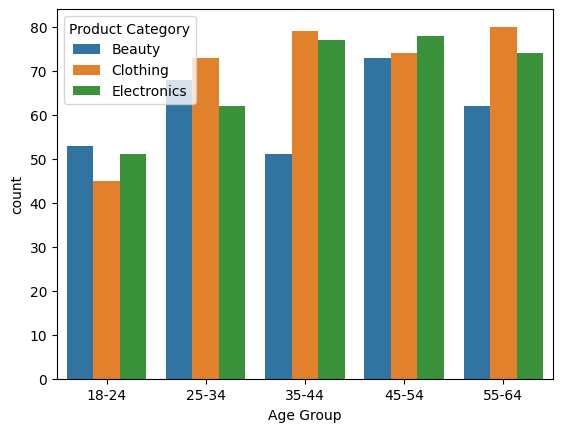

In [ ]:
#Gender by Product Category
sns.countplot(x='Age Group', hue='Product Category', data=df)

<Axes: xlabel='Age Group', ylabel='count'>

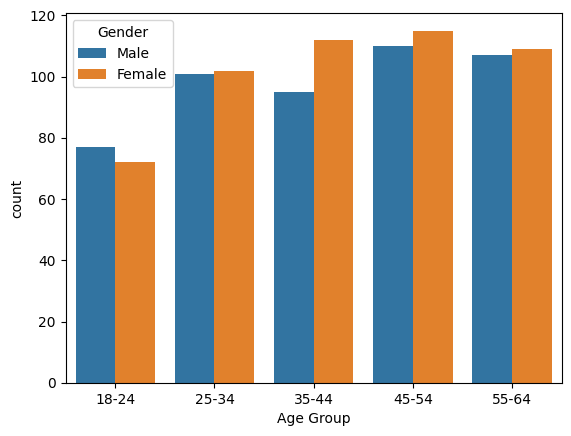

In [ ]:
#Gender by Age Group
sns.countplot(x='Age Group', hue='Gender', data=df)

<ipython-input-123-2f0c4904b400>:2: FutureWarning: 

The `ci` parameter is deprecated. Use `errorbar=None` for the same effect.

  sns.barplot(x='Product Category', y='Total Amount', ci=None,  data=df)


<Axes: xlabel='Product Category', ylabel='Total Amount'>

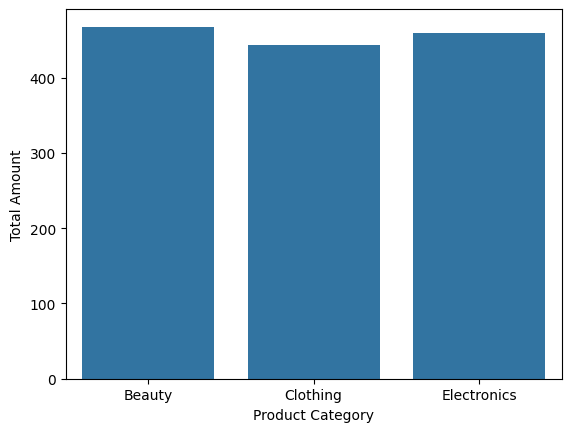

In [ ]:
#Visualise Product Category by Total Amount
sns.barplot(x='Product Category', y='Total Amount', ci=None,  data=df)





<Axes: xlabel='Product Category', ylabel='count'>

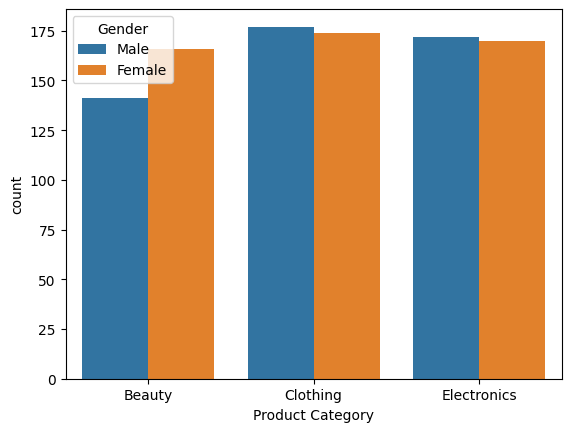

In [ ]:
#Visualize Gender by Product Category
sns.countplot(x='Product Category', hue='Gender', data=df)


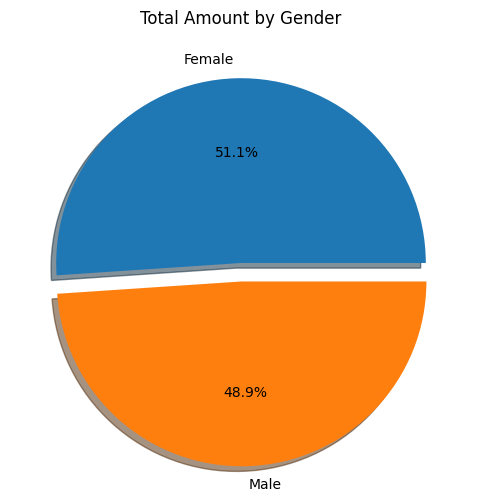

In [ ]:
#Total Amount by Gender
explode = (0, 0.1)
fig, ax = plt.subplots(figsize=(10,6))
ax.pie(df.groupby('Gender')['Total Amount'].sum(), explode=explode, labels=df.groupby('Gender')['Total Amount'].sum().index, autopct='%1.1f%%', shadow=True)
ax.set_title('Total Amount by Gender')
plt.show()

In [ ]:
df['Date'].sort_values(ascending=True).head()


,Date
521,2023-01-01
179,2023-01-01
558,2023-01-01
302,2023-01-02
978,2023-01-02


In [ ]:
#pd.set_option('display.max_rows', None)
#df['Date'].sort_values(ascending=False)

In [ ]:
#Group/filter date by 2024
df_2024 = df[df['Date'].str.contains('2024')]

In [ ]:
df_2024

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
210,211,2024-01-01,CUST211,Male,42,Beauty,3,500,1500,35-44
649,650,2024-01-01,CUST650,Male,55,Electronics,1,30,30,55-64


In [ ]:
df_2023 = df[df['Date'].str.contains('2023')]


In [ ]:
df_2023.head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34
1,2,2023-02-27,CUST002,Female,26,Clothing,2,500,1000,25-34
2,3,2023-01-13,CUST003,Male,50,Electronics,1,30,30,45-54
3,4,2023-05-21,CUST004,Male,37,Clothing,1,500,500,35-44
4,5,2023-05-06,CUST005,Male,30,Beauty,2,50,100,25-34


In [ ]:
#extract the month and year from the date column
df['Date'] = pd.to_datetime(df['Date'])
df['Month'] = df['Date'].dt.month
df['Year'] = df['Date'].dt.year

In [ ]:
df.sort_values(by='Year', ascending=True).head()

,Transaction ID,Date,Customer ID,Gender,Age,Product Category,Quantity,Price per Unit,Total Amount,Age Group,Month,Year
0,1,2023-11-24,CUST001,Male,34,Beauty,3,50,150,25-34,11,2023
658,659,2023-03-19,CUST659,Female,39,Electronics,1,30,30,35-44,3,2023
659,660,2023-04-29,CUST660,Female,38,Beauty,2,500,1000,35-44,4,2023
660,661,2023-07-16,CUST661,Female,44,Clothing,4,25,100,35-44,7,2023
661,662,2023-12-22,CUST662,Male,48,Beauty,2,500,1000,45-54,12,2023


<Axes: xlabel='Year', ylabel='Total Amount'>

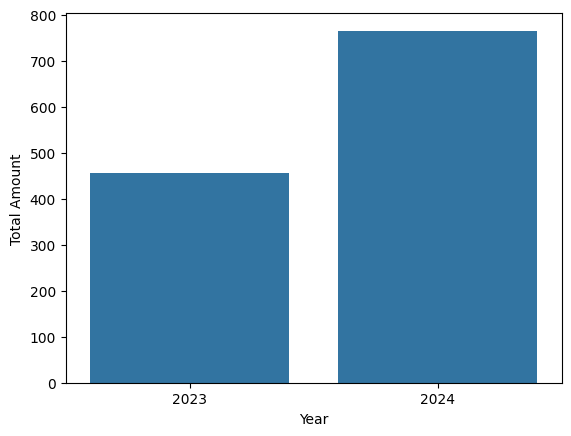

In [ ]:
#visualize total amount by year
sns.barplot(x='Year', y='Total Amount', errorbar=None, data=df)


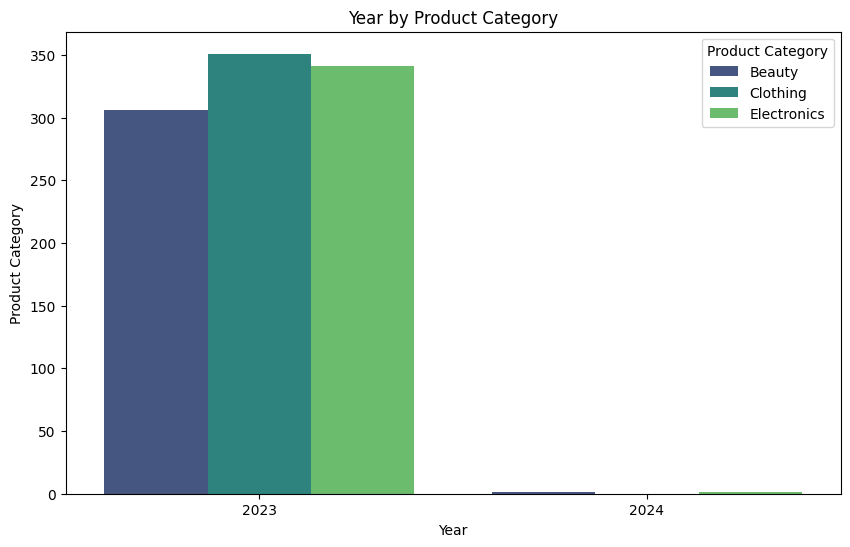

In [ ]:
#plot year by product category
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Year', hue='Product Category', data=df, palette='viridis')
ax.set_title('Year by Product Category')
ax.set_xlabel('Year')
ax.set_ylabel('Product Category')
plt.show()

<Axes: xlabel='Month', ylabel='count'>

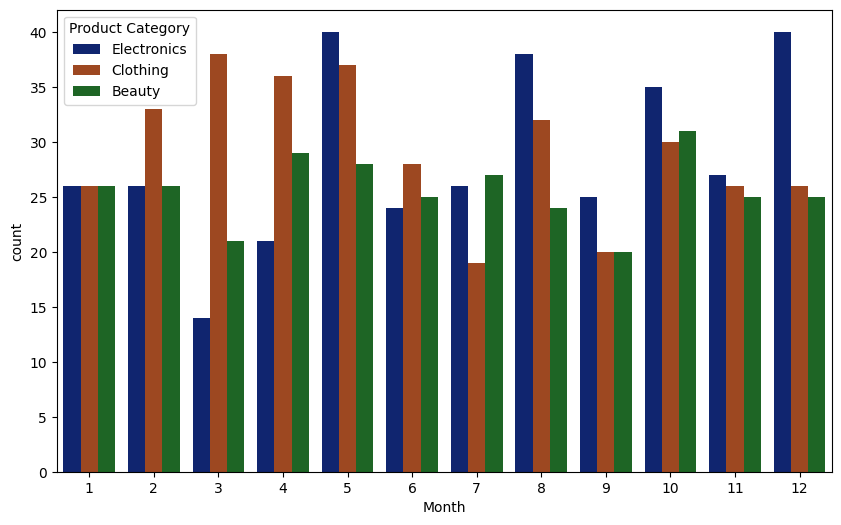

In [ ]:
#Month by Product category
fig, ax = plt.subplots(figsize=(10,6))
sns.countplot(x='Month', hue='Product Category', data=df, palette='dark')